# MNIST: learning to recognize handwritten digits

## Dataset exploration

Before starting a machine learning or data science task, it is always useful to familiarize yourself with the data set and its context.

### Required imports

In [1]:
from collections import Counter
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Using TensorFlow backend.


### Obtaining the dataset

In Keras' datasets module we have a handle to the MNIST dataset we want to use in this notebook.  Download the training and test set for this data.

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Dimensions and types

Determine the shape and type of the training and the test set.

In [3]:
x_train.shape, x_train.dtype, y_train.shape, y_train.dtype

((60000, 28, 28), dtype('uint8'), (60000,), dtype('uint8'))

In [4]:
x_test.shape, x_test.dtype, y_test.shape, y_test.dtype

((10000, 28, 28), dtype('uint8'), (10000,), dtype('uint8'))

The training set has 60,000 examples, the test set 10,000.  The input is a 28 $\times$ 28 matrix of unsigned 8-bit integers, the output a single unsigned 8-bit integer.

### Data semantics

 Each input represents a scanned grayscale image of a handwritten digit, the output is the corresponding integer.

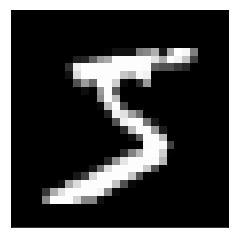

In [5]:
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)
plt.imshow(x_train[0], cmap='gray');

In [6]:
y_train[0]

5

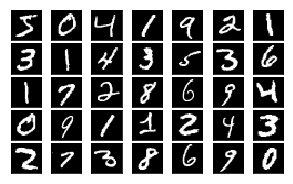

In [7]:
rows = 5
cols = 7
figure, axes = plt.subplots(rows, cols, figsize=(5, 3))
plt.subplots_adjust(wspace=0.1, hspace=0.1)
for img_nr in range(rows*cols):
    row = img_nr//cols
    col = img_nr % cols
    axes[row, col].get_xaxis().set_visible(False)
    axes[row, col].get_yaxis().set_visible(False)
    axes[row, col].imshow(x_train[img_nr], cmap='gray')

In [8]:
y_train[:rows*cols].reshape(rows, cols)

array([[5, 0, 4, 1, 9, 2, 1],
       [3, 1, 4, 3, 5, 3, 6],
       [1, 7, 2, 8, 6, 9, 4],
       [0, 9, 1, 1, 2, 4, 3],
       [2, 7, 3, 8, 6, 9, 0]], dtype=uint8)

So this proves that I'm certainly not the only one cursed with bad handwriting.

### Data distribution

An important question is whether all digits are represented in the training and test set, and what the distribution is.  This may have an impact on the accuracy of the trained model.

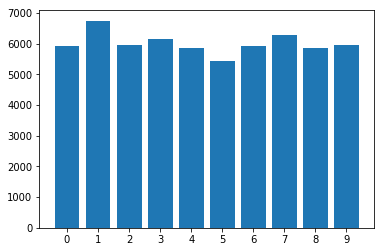

In [9]:
distr = Counter(y_train)
figure, axes = plt.subplots()
axes.set_xticks(list(distr.keys()))
axes.bar(list(distr.keys()), list(distr.values()));

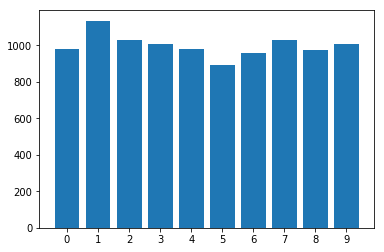

In [10]:
distr = Counter(y_test)
figure, axes = plt.subplots()
axes.set_xticks(list(distr.keys()))
axes.bar(list(distr.keys()), list(distr.values()));

Although some digits like 1 are overrepresented, and others, e.g., 5 are underrepresented, the distribution seems to be reasonably uniform, and it is likely no special care needs to be taken.